# Exploratory Data Analysis

In this notebook, we explored the different datasets, conducting statistical and descriptive analysis and examining their graphical distributions through Histograms and BoxPlots. This analysis enabled us to identify any missing values and duplicates, thereby verifying the data quality. Additionally, certain transformations were applied as needed. Through this analysis, we gained a comprehensive understanding of the datasets and obtained an overview of the Steam platform, its users, and the available apps/games.

# <font color='#0087A7'>Contents</font> <a class="anchor" id="toc"></a>
* [Imports](#import)
* [Recommendations](#recommendations)
* [Games](#games)
* [Users](#users)

# <font color='#0087A7'>Imports</font> <a class="anchor" id="import"></a>
[Back to Contents](#toc)

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import sklearn
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
from sklearn.feature_selection import mutual_info_classif
import datetime

# <font color='#0087A7'>Recommendations</font> <a class="anchor" id="recommendations"></a>
[Back to Contents](#toc)

In [2]:
# Create a dataframe for the data in the csv file
recommendations = pd.read_csv('recommendations.csv')
recommendations.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,23221,0
1,304390,4,0,2017-02-17,False,11.5,1283,1
2,1085660,2,0,2019-11-17,True,336.5,105979,2
3,703080,0,0,2022-09-23,True,27.4,108133,3
4,526870,0,0,2021-01-10,True,7.9,10612,4


In [3]:
recommendations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13207260 entries, 0 to 13207259
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 717.9+ MB


In [4]:
#Check for duplicate rows
recommendations.duplicated().sum()

0

In [5]:
#Check for missing values
round(recommendations.isna().sum()/len(recommendations)*100, 3)

app_id            0.0
helpful           0.0
funny             0.0
date              0.0
is_recommended    0.0
hours             0.0
user_id           0.0
review_id         0.0
dtype: float64

In [6]:
#There should only be recommendations were the players actually played the games
recommendations = recommendations[recommendations['hours']!=0]
recommendations.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,23221,0
1,304390,4,0,2017-02-17,False,11.5,1283,1
2,1085660,2,0,2019-11-17,True,336.5,105979,2
3,703080,0,0,2022-09-23,True,27.4,108133,3
4,526870,0,0,2021-01-10,True,7.9,10612,4


In [7]:
#Check number of unique apps, users and reviews
print('unique apps:' + str(recommendations['app_id'].nunique()))
print('unique users:' + str(recommendations['user_id'].nunique()))
print('unique reviews:' + str(recommendations['review_id'].nunique()))

unique apps:1899
unique users:6623321
unique reviews:13206475


In [8]:
recommendations = recommendations.groupby("user_id").filter(lambda x: len(x) > 19)

In [9]:
#Check number of unique apps, users and reviews
print('unique apps:' + str(recommendations['app_id'].nunique()))
print('unique users:' + str(recommendations['user_id'].nunique()))
print('unique reviews:' + str(recommendations['review_id'].nunique()))

unique apps:1865
unique users:22037
unique reviews:641192


In [10]:
#Remove column attributes 'helpful', 'funny', 'date', 'review_id'
recommendations = recommendations.drop(['helpful', 'funny', 'date', 'review_id'], axis=1)
recommendations.head()

,app_id,is_recommended,hours,user_id
58,602960,True,41.9,306996
138,570940,False,73.3,2420714
139,397540,True,86.3,2469853
141,39210,True,123.1,2488654
151,1196590,True,19.0,2837294


In [11]:
#Encode 'is_recommended'
label_encoder = LabelEncoder()
recommendations['is_recommended'] = label_encoder.fit_transform(recommendations['is_recommended'])
display(recommendations.head())

,app_id,is_recommended,hours,user_id
58,602960,1,41.9,306996
138,570940,0,73.3,2420714
139,397540,1,86.3,2469853
141,39210,1,123.1,2488654
151,1196590,1,19.0,2837294


In [12]:
recommendations.describe()

,app_id,is_recommended,hours,user_id
count,6.411920e+05,641192.000000,641192.000000,6.411920e+05
mean,6.092568e+05,0.795322,74.592543,3.760452e+06
std,4.631645e+05,0.403467,138.443307,1.841990e+06
min,3.000000e+01,0.000000,0.100000,5.050000e+02
25%,2.620600e+05,1.000000,7.300000,2.405057e+06
50%,4.409000e+05,1.000000,23.300000,3.921597e+06
75%,9.453600e+05,1.000000,71.100000,5.356274e+06
max,2.220810e+06,1.000000,999.900000,6.791053e+06


<AxesSubplot:xlabel='hours', ylabel='Count'>

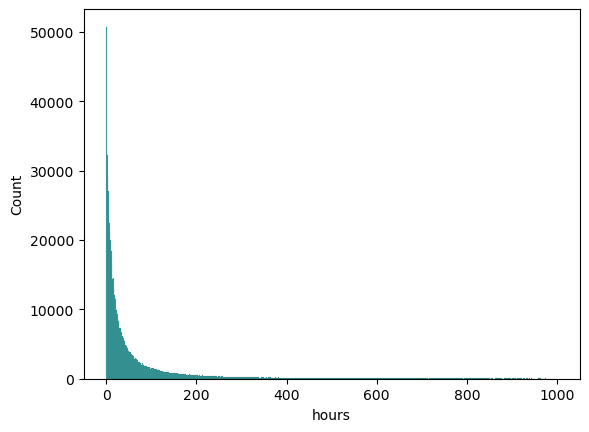

In [13]:
sns.histplot(data = recommendations, x = 'hours', color = "darkcyan")

In [14]:
# Computing the point biserial correlation coefficient
corr, pval = scipy.stats.pointbiserialr(recommendations['is_recommended'], recommendations['hours'])
print('Point Biserial correlation: %.3f' % corr, 'p-value: %.3f' % pval)

Point Biserial correlation: 0.063 p-value: 0.000


# <font color='#0087A7'>Games</font> <a class="anchor" id="games"></a>
[Back to Contents](#toc)

In [15]:
#Create the game dataframe
games = pd.read_csv('games.csv')
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True


<AxesSubplot:xlabel='price_original', ylabel='Count'>

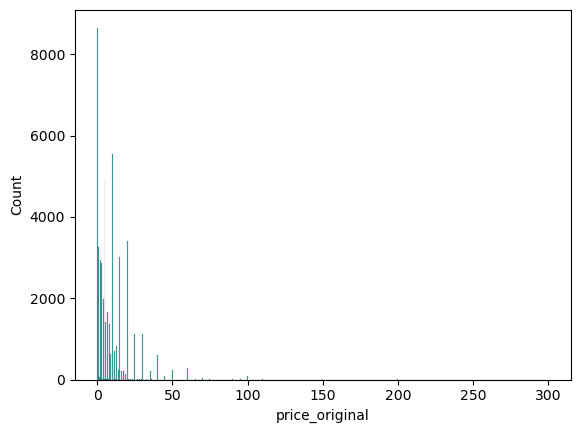

In [16]:
sns.histplot(data = games, x = 'price_original', color = "darkcyan")

<AxesSubplot:xlabel='positive_ratio', ylabel='Count'>

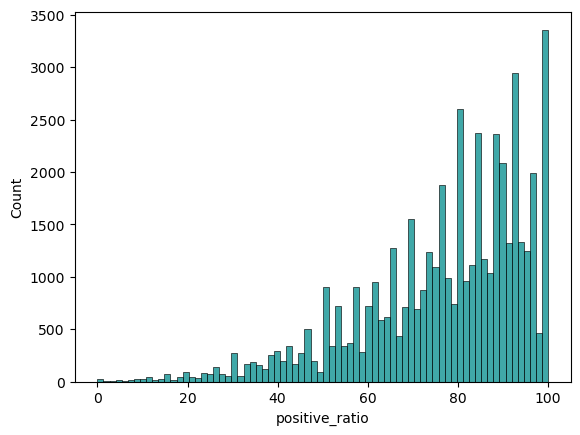

In [17]:
sns.histplot(data = games, x = 'positive_ratio', color = "darkcyan")

In [18]:
metadata = pd.read_json('games_metadata.json', lines=True)

In [19]:
metadatadf = pd.DataFrame(metadata)
metadatadf.head()

,app_id,description,tags
0,10090,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti..."
1,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
2,22364,,[Action]
3,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
4,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."


In [20]:
games_metadf = pd.merge(games, metadatadf, on='app_id')
games_metadf.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,description,tags
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti..."
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,,[Action]
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."


In [21]:
# These are the columns that we are interested in
relevant_cols = ['app_id', 'title', 'positive_ratio', 'user_reviews', 'tags']
gamesdf = games_metadf[relevant_cols]
# Sort by user reviews to keep the top 100 reviewed games
gamesdf = gamesdf.sort_values(by = 'user_reviews', ascending = False)
gamesdf = gamesdf.head(100)
review_avg = gamesdf['user_reviews'].mean()

Series Size  246
Average Common Genres  8.130081300813009


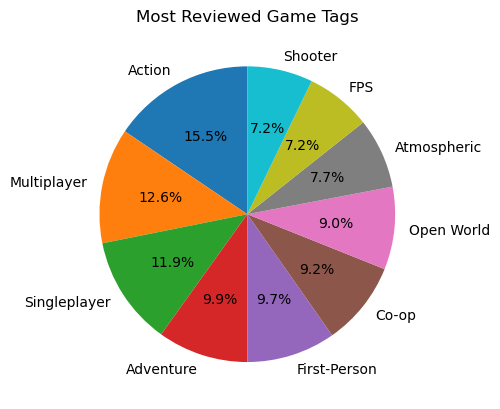

In [22]:
genres = gamesdf['tags']
count_list = []
for i in genres:
    for j in i:
        count_list.append(j)

sorted_genres = pd.value_counts(np.array(count_list))
sorted_genres = sorted_genres.sort_values(ascending=False)
print("Series Size ", sorted_genres.size)
print("Average Common Genres ", sorted_genres.mean())

# Create a chart to help us see our results
genre_slice = sorted_genres.head(10)
labels = genre_slice.keys()

fig, ax = plt.subplots()
title = 'Most Reviewed Game Tags'
title_text = plt.title(title)
title_text.set_color('black')

#Set different colors for each label font
pchart = plt.pie(genre_slice, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, textprops={'fontsize': 10, 'color': 'black'})

Series Size  108
Average Common Genres  1.8518518518518519


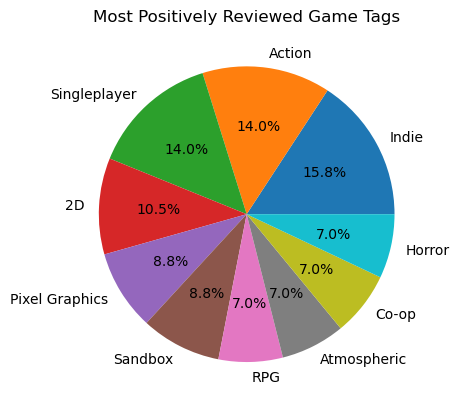

In [23]:
# Pick out the top 10 most positively reviewed games will help give a picture of games that are almost universally loved by players
gamesdf = gamesdf.sort_values('positive_ratio', ascending=False)
positivedf = gamesdf.head(10)
tags = positivedf['tags']
count_list = []
for i in tags:
    for j in i:
        count_list.append(j)

sorted_tags = pd.value_counts(np.array(count_list))
sorted_tags = sorted_tags.sort_values(ascending=False)
print("Series Size ", sorted_tags.size)
print("Average Common Genres ", sorted_tags.mean())  

# Create a chart to help us see our results
tag_slice = sorted_tags.head(10)
labels = tag_slice.keys()

fig, ax = plt.subplots()
title = 'Most Positively Reviewed Game Tags'
title_text = plt.title(title)
title_text.set_color('black')
pchart = ax.pie(tag_slice, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 10, 'color': 'black'})

In [24]:
#display the recommendations dataframe
display(recommendations.head())

,app_id,is_recommended,hours,user_id
58,602960,1,41.9,306996
138,570940,0,73.3,2420714
139,397540,1,86.3,2469853
141,39210,1,123.1,2488654
151,1196590,1,19.0,2837294


# <font color='#0087A7'>Users</font> <a class="anchor" id="users"></a>
[Back to Contents](#toc)

In [25]:
#dsiplay the users dataframe
users = pd.read_csv('users.csv')
users.head()

,user_id,products,reviews
0,6706132,156,1
1,4222883,329,4
2,2274077,176,2
3,2451933,98,2
4,2717184,144,3


In [26]:
#from the users table, filter values to only include users with more than 19 reviews
users = pd.read_csv('users.csv')
users = users[users['reviews'] > 19]
users.head()

,user_id,products,reviews
33,2176352,702,36
69,4328487,1227,22
82,5251669,404,20
369,5367828,433,40
464,5729823,1068,20


In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23227 entries, 33 to 6840722
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   23227 non-null  int64
 1   products  23227 non-null  int64
 2   reviews   23227 non-null  int64
dtypes: int64(3)
memory usage: 725.8 KB


In [28]:
#Check for duplicate rows
users.duplicated().sum()

0

In [29]:
users.describe()

,user_id,products,reviews
count,2.322700e+04,23227.000000,23227.000000
mean,3.785759e+06,601.456495,29.256985
std,1.855965e+06,859.186932,13.637754
min,5.070000e+02,3.000000,20.000000
25%,2.421230e+06,216.000000,22.000000
50%,3.933397e+06,374.000000,25.000000
75%,5.396932e+06,672.000000,32.000000
max,6.844082e+06,29308.000000,322.000000


<AxesSubplot:xlabel='reviews', ylabel='Count'>

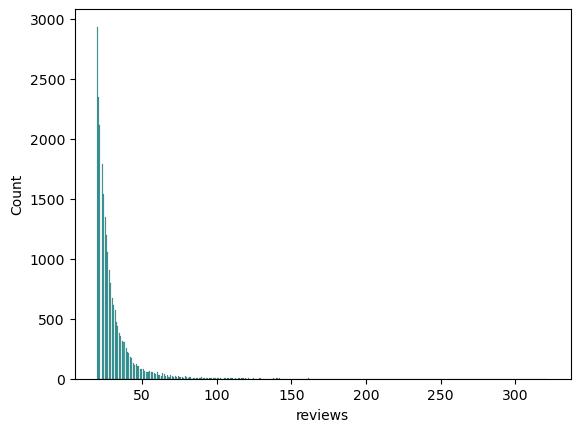

In [30]:
sns.histplot(data = users, x = 'reviews', color = "darkcyan")

<AxesSubplot:xlabel='reviews'>

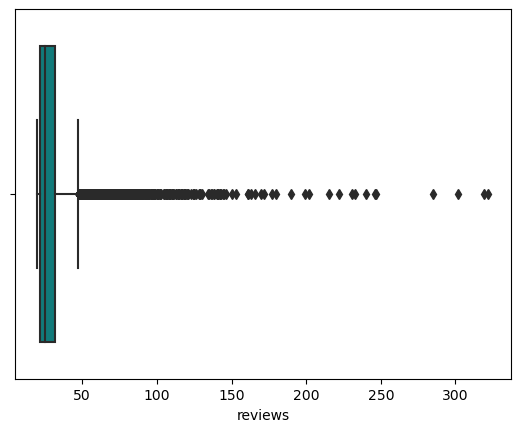

In [31]:
sns.boxplot(data = users, x = 'reviews', color = "darkcyan")

In [32]:
#merge users and recommendations tables on user_id
user_recommendations = pd.merge(users, recommendations, on='user_id')
display(user_recommendations)

,user_id,products,reviews,app_id,is_recommended,hours
0,115848,82,36,1145360,1,106.9
1,115848,82,36,678950,1,32.3
2,115848,82,36,594650,1,9.7
3,115848,82,36,613100,1,8.5
4,115848,82,36,1091500,1,208.2
...,...,...,...,...,...,...
2733,2393304,197,31,505460,1,64.0
2734,2393304,197,31,1611600,1,102.2
2735,2393304,197,31,22380,0,18.7
2736,2393304,197,31,1455840,1,7.3


<AxesSubplot:xlabel='products', ylabel='Count'>

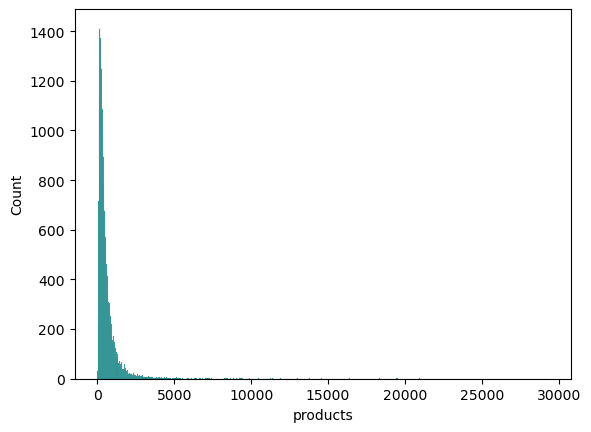

In [33]:
sns.histplot(data = users, x = 'products', color = "darkcyan")

<AxesSubplot:>

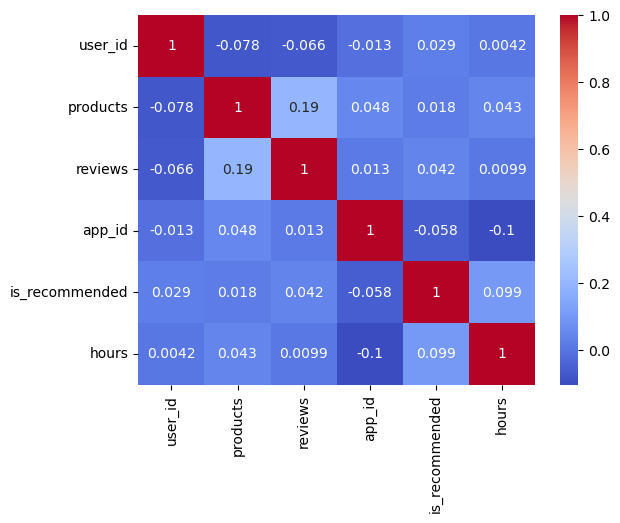

In [34]:
#use a correlation matrix to find the correlation between the attributes
import seaborn as sns
corr = user_recommendations.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [35]:
#displaying the user_recommendations table
display(user_recommendations)

#selecting independent columns like user_id, app_id, hours
X = user_recommendations.iloc[:,0:6]  #independent columns

#selecting target column i.e is_recommended column
y = user_recommendations.iloc[:,-2].astype(int)    #target column i.e is_recommended

# Compute mutual information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame for visualization
df_mi = pd.DataFrame(mutual_info, index=X.columns, columns=['mutual_info'])

# Sort the DataFrame by mutual_info in descending order
df_mi.sort_values('mutual_info', ascending=False, inplace=True)

print(df_mi)



,user_id,products,reviews,app_id,is_recommended,hours
0,115848,82,36,1145360,1,106.9
1,115848,82,36,678950,1,32.3
2,115848,82,36,594650,1,9.7
3,115848,82,36,613100,1,8.5
4,115848,82,36,1091500,1,208.2
...,...,...,...,...,...,...
2733,2393304,197,31,505460,1,64.0
2734,2393304,197,31,1611600,1,102.2
2735,2393304,197,31,22380,0,18.7
2736,2393304,197,31,1455840,1,7.3


                mutual_info
is_recommended     0.501798
user_id            0.104336
products           0.097210
app_id             0.046624
hours              0.038209
reviews            0.025137


In [36]:
#Gather relevant statistics for the dataframe 'user_recommendations'

user_recommendations.describe()

#display the user_recommendations table

display(user_recommendations)

#gathering insights from the user_recommendations table

user_recommendations.info()

,user_id,products,reviews,app_id,is_recommended,hours
0,115848,82,36,1145360,1,106.9
1,115848,82,36,678950,1,32.3
2,115848,82,36,594650,1,9.7
3,115848,82,36,613100,1,8.5
4,115848,82,36,1091500,1,208.2
...,...,...,...,...,...,...
2733,2393304,197,31,505460,1,64.0
2734,2393304,197,31,1611600,1,102.2
2735,2393304,197,31,22380,0,18.7
2736,2393304,197,31,1455840,1,7.3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2738 entries, 0 to 2737
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2738 non-null   int64  
 1   products        2738 non-null   int64  
 2   reviews         2738 non-null   int64  
 3   app_id          2738 non-null   int64  
 4   is_recommended  2738 non-null   int64  
 5   hours           2738 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 149.7 KB
